# Importaciones

In [23]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Carga del modelo y sus métricas

In [25]:
# 1️⃣ Cargar el modelo
modelo = tf.keras.models.load_model("./results/multiclass/models/best_multiclass_model.h5")

# 2️⃣ Leer el CSV con las rutas de imágenes
csv_path = "./results/csv_files/registro_imagenes_reales.csv"
df = pd.read_csv(csv_path)

In [26]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 48)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 48)   │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 48)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 48)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 48)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 96)   │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 96)   │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 96)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 129792)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,613,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,824,741 (64.18 MB)

 Trainable params: 16,823,811 (64.18 MB)

 Non-trainable params: 928 (3.62 KB)

 Optimizer params: 2 (12.00 B)

# Mapa de características

In [ ]:
from tensorflow.keras.layers import Input

# Definir el input explícito
input_layer = Input(shape=(1, 224, 224, 3))

In [28]:
print([layer.name for layer in modelo.layers])

['conv2d', 'batch_normalization', 'activation', 'max_pooling2d', 'dropout', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'max_pooling2d_1', 'dropout_1', 'conv2d_2', 'batch_normalization_2', 'activation_2', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'batch_normalization_3', 'activation_3', 'dropout_3', 'dense_1']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


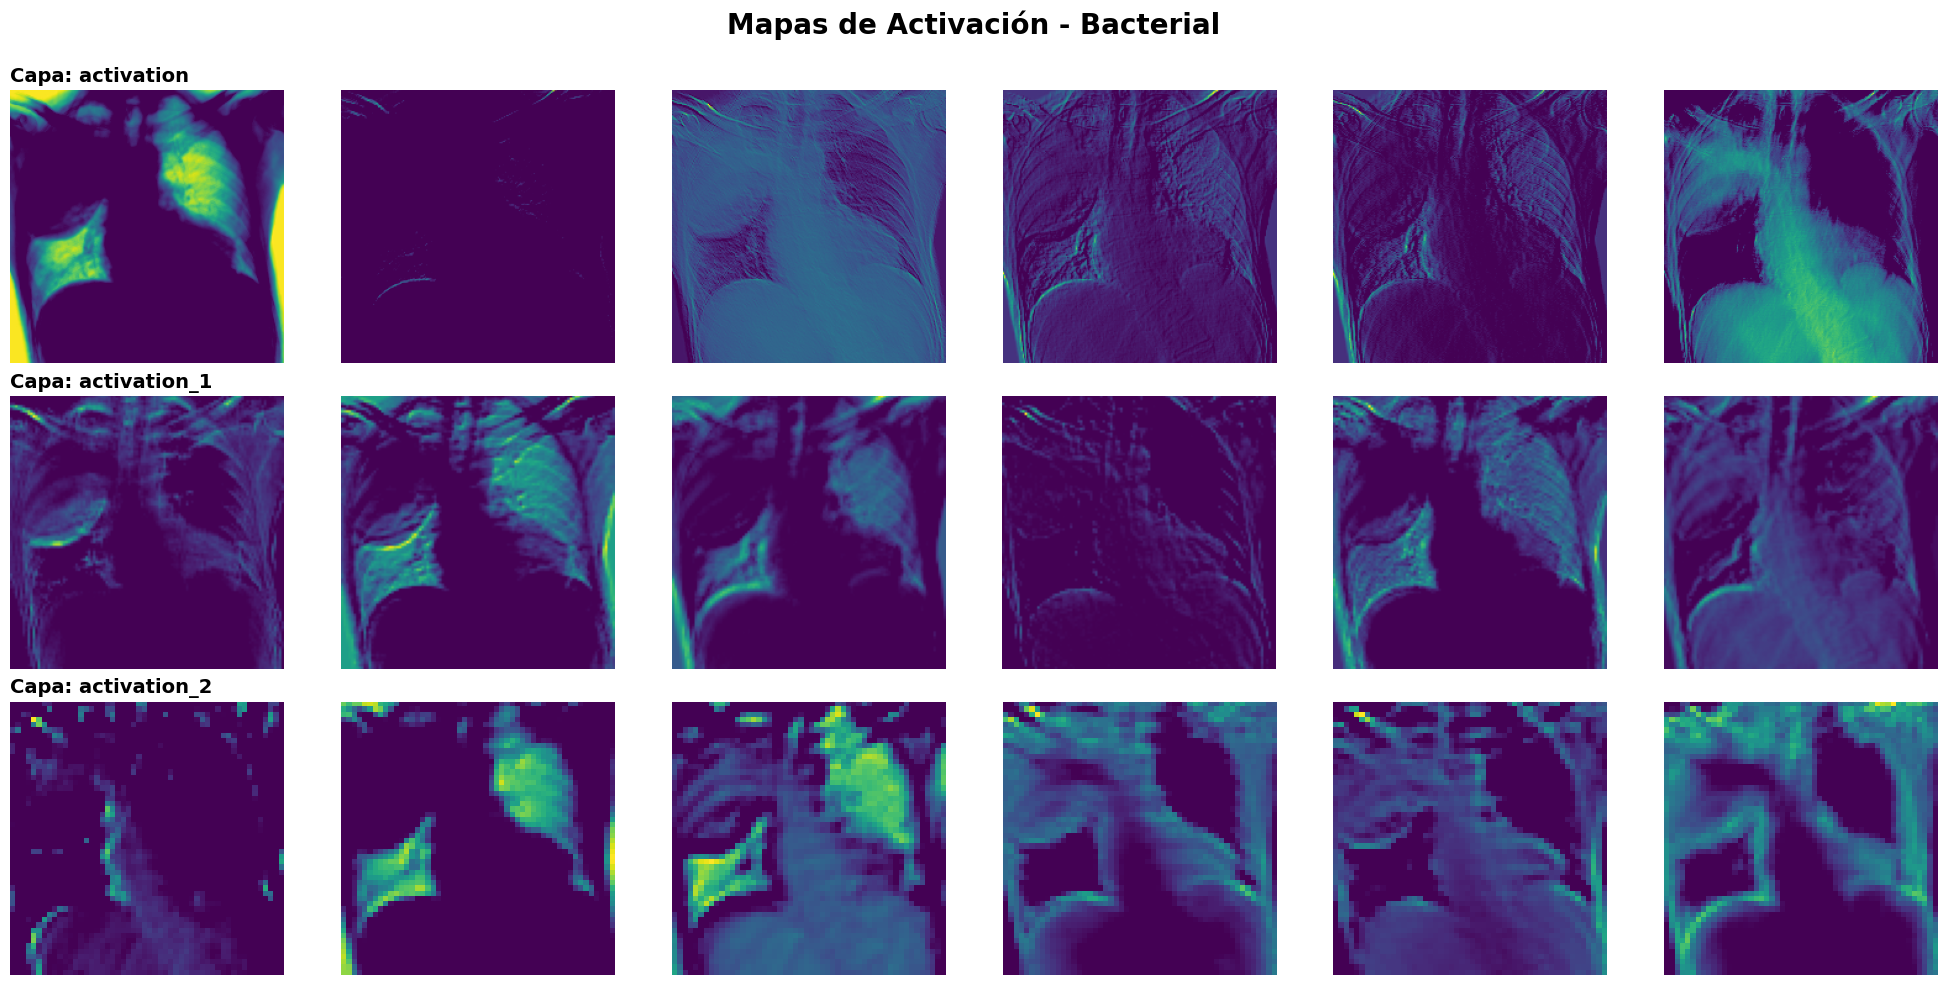

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


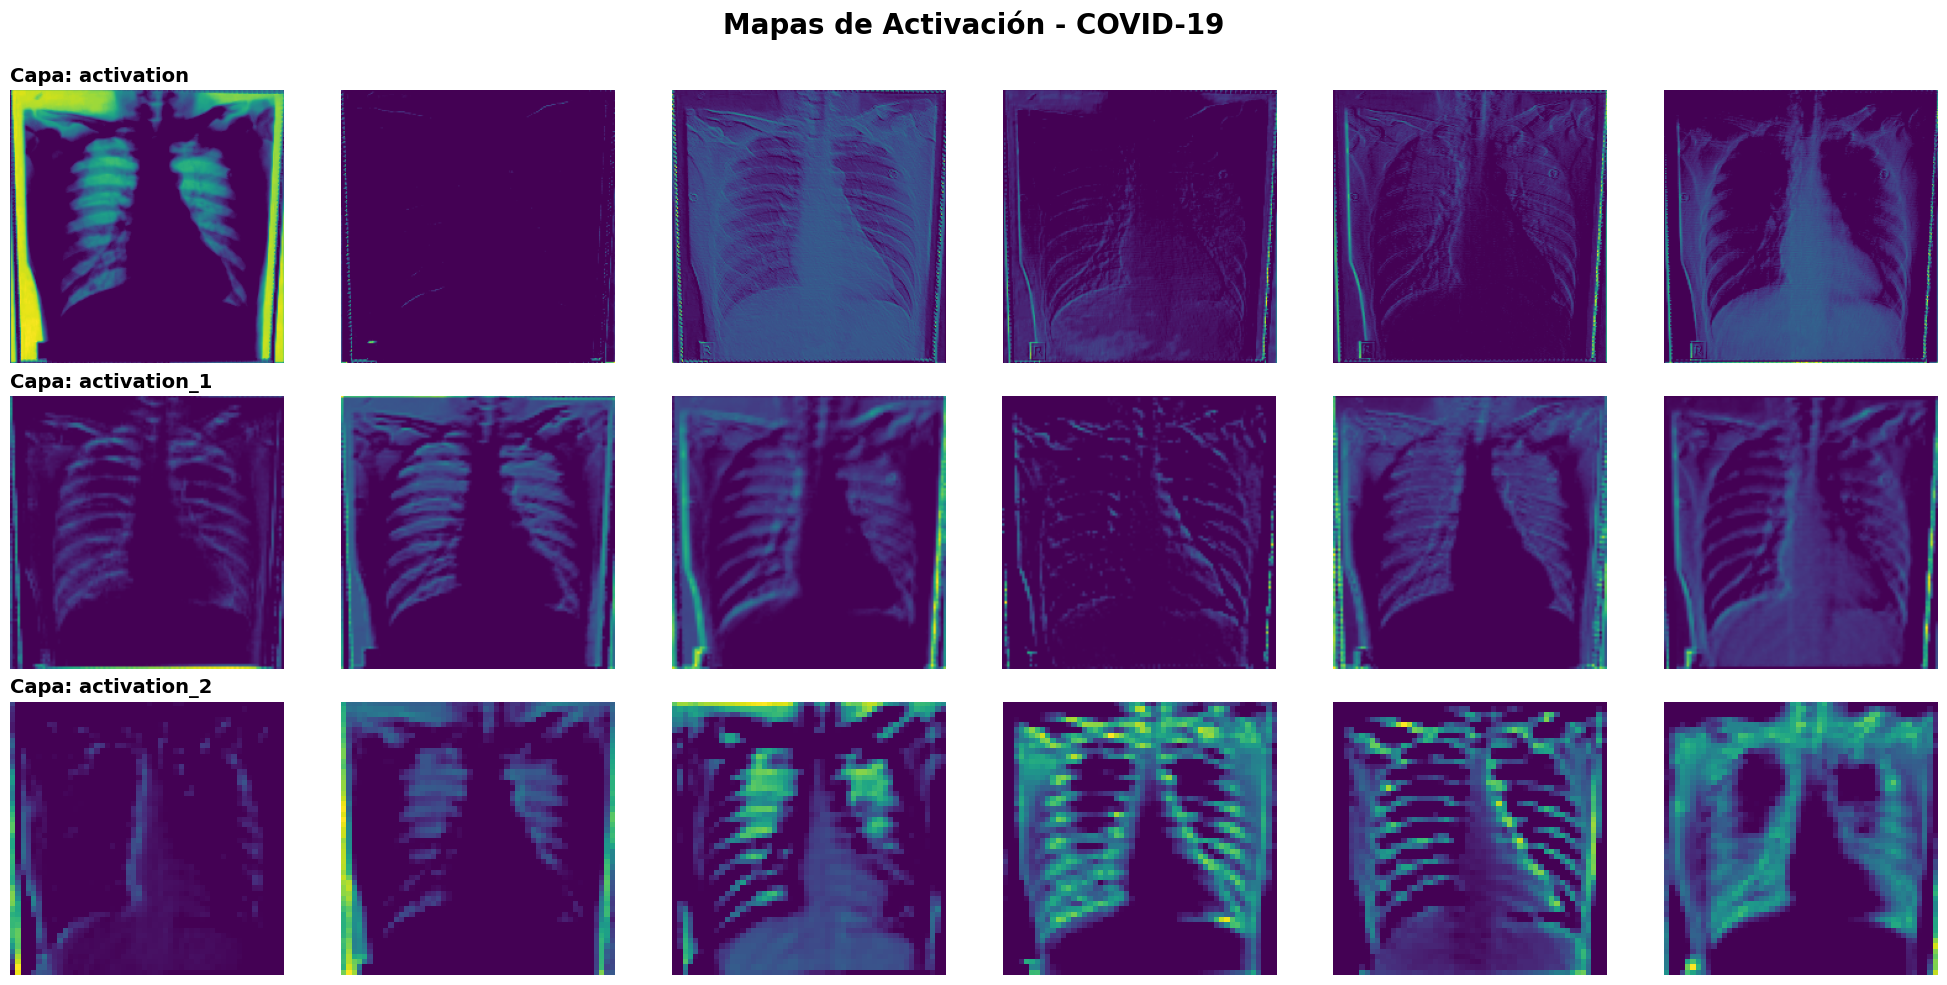

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


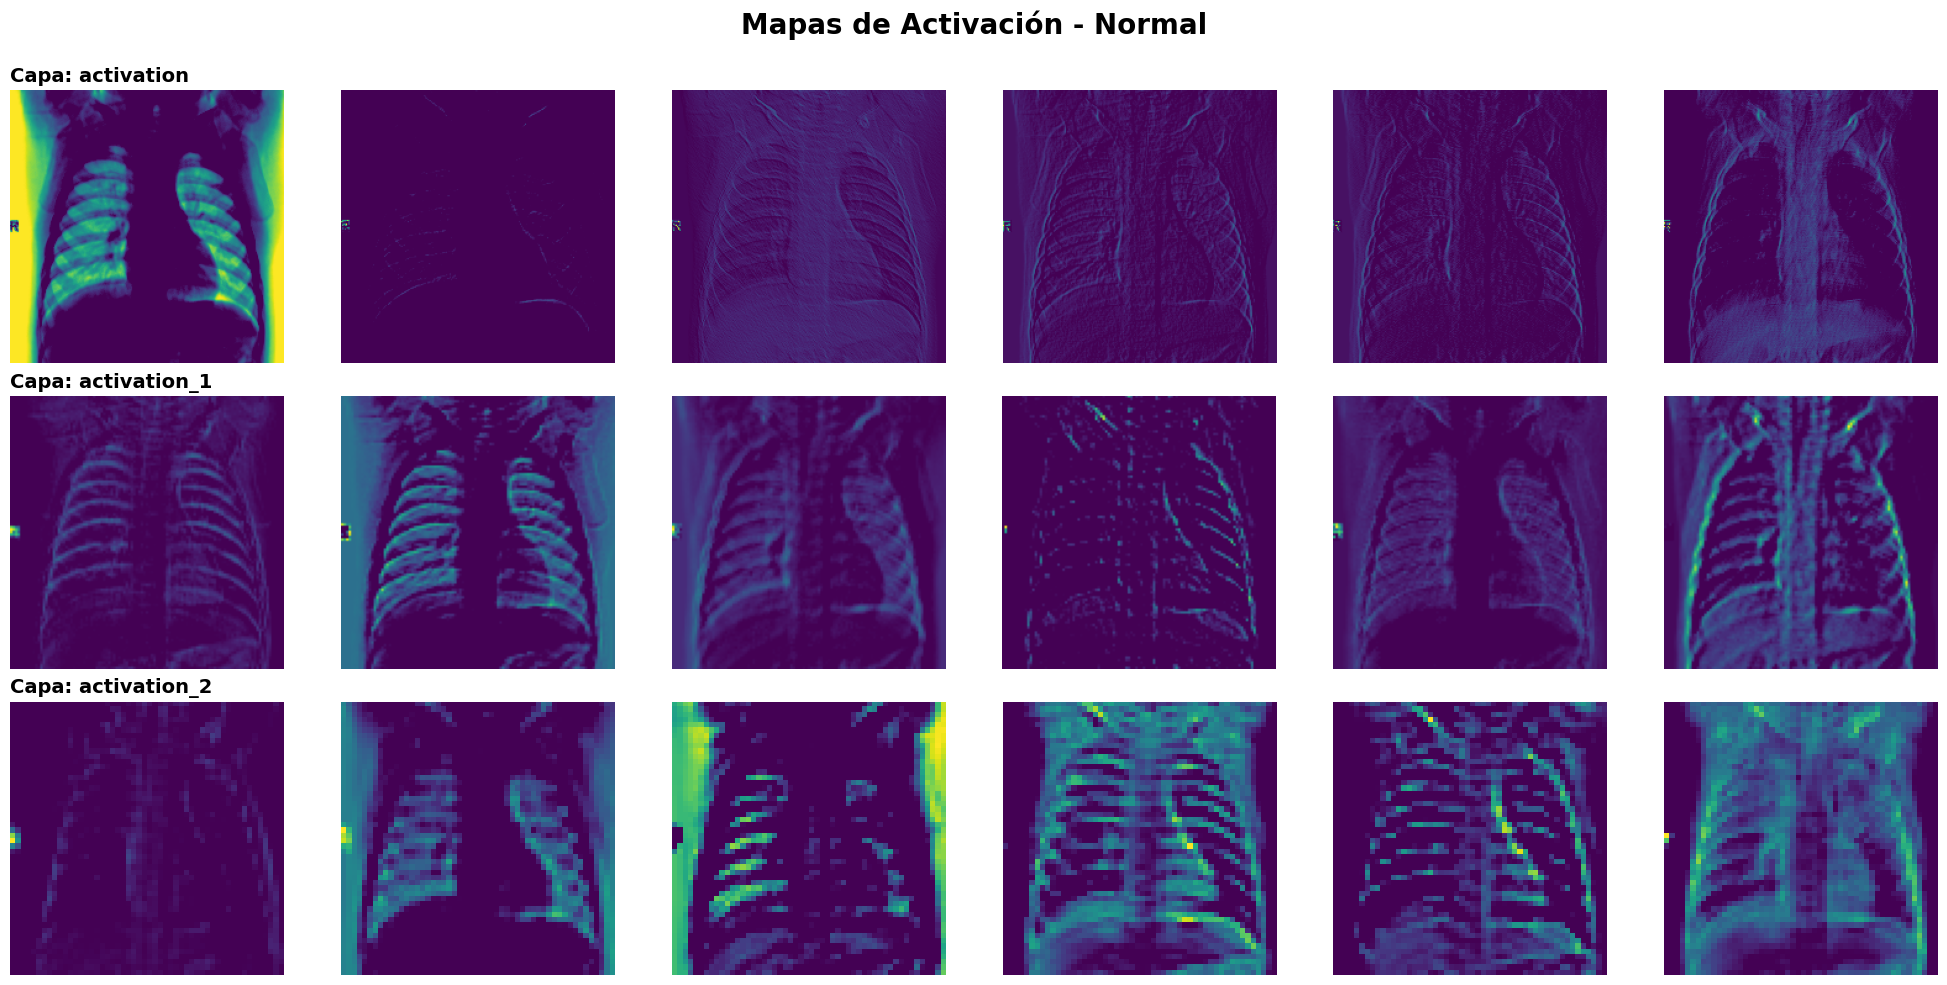

In [ ]:
# Definir rutas de las imágenes
img_paths = {
    "Bacterial": "./data/covid-chest-xray/Bacterial/Bacterial-1.jpg",
    "COVID-19": "./data/covid-chest-xray/COVID-19/COVID-19-25.jpg",
    "Normal": "./data/covid-chest-xray/Normal/Normal-1.jpeg"
}

# Definir las capas de interés
conv_layers = [
                'activation',
                'activation_1',
                'activation_2'
               ]

# Procesar cada imagen
for label, img_path in img_paths.items():
    img = load_img(img_path, target_size=(224, 224), color_mode='rgb')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones

    # Crear figura con 3 filas (una por cada capa) y 6 columnas (para 6 filtros)
    fig, axes = plt.subplots(len(conv_layers), 6, figsize=(20, 10))
    fig.suptitle(f"Mapas de Activación - {label}", fontsize=20, fontweight="bold")

    # Iterar sobre cada capa de convolución
    for row, layer_name in enumerate(conv_layers):
        layer_index = [i for i, layer in enumerate(modelo.layers) if layer.name == layer_name][0]
        intermediate_model = tf.keras.Sequential(modelo.layers[:layer_index + 1])  # Tomar solo hasta esa capa

        # Obtener la salida de la imagen en esa capa
        feature_maps = intermediate_model.predict(img_array)

        # Visualizar las activaciones de algunos filtros (máx 6)
        num_filters = feature_maps.shape[-1]
        for col in range(min(num_filters, 6)):  # Mostrar solo 6 filtros
            axes[row, col].imshow(feature_maps[0, :, :, col], cmap='viridis')
            axes[row, col].axis("off")

            # Agregar título en la primera columna de cada fila
            if col == 0:
                axes[row, col].set_title(f"Capa: {layer_name}", fontsize=14, fontweight="bold", loc="left")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Ajustar espacio del título superior
    plt.show()

# Análisis del modelo

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


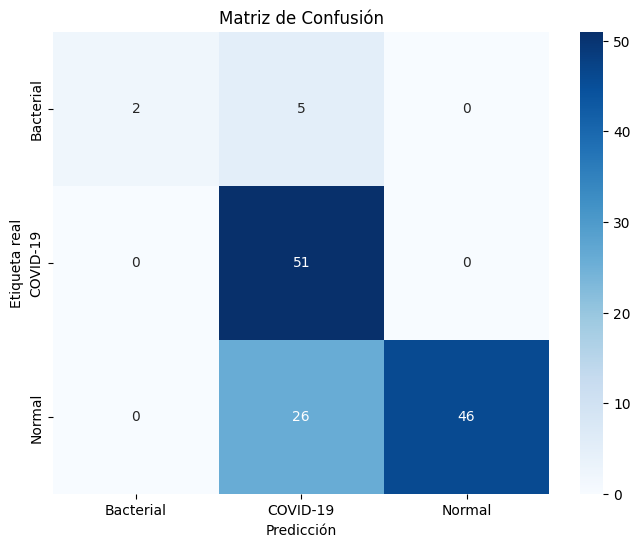

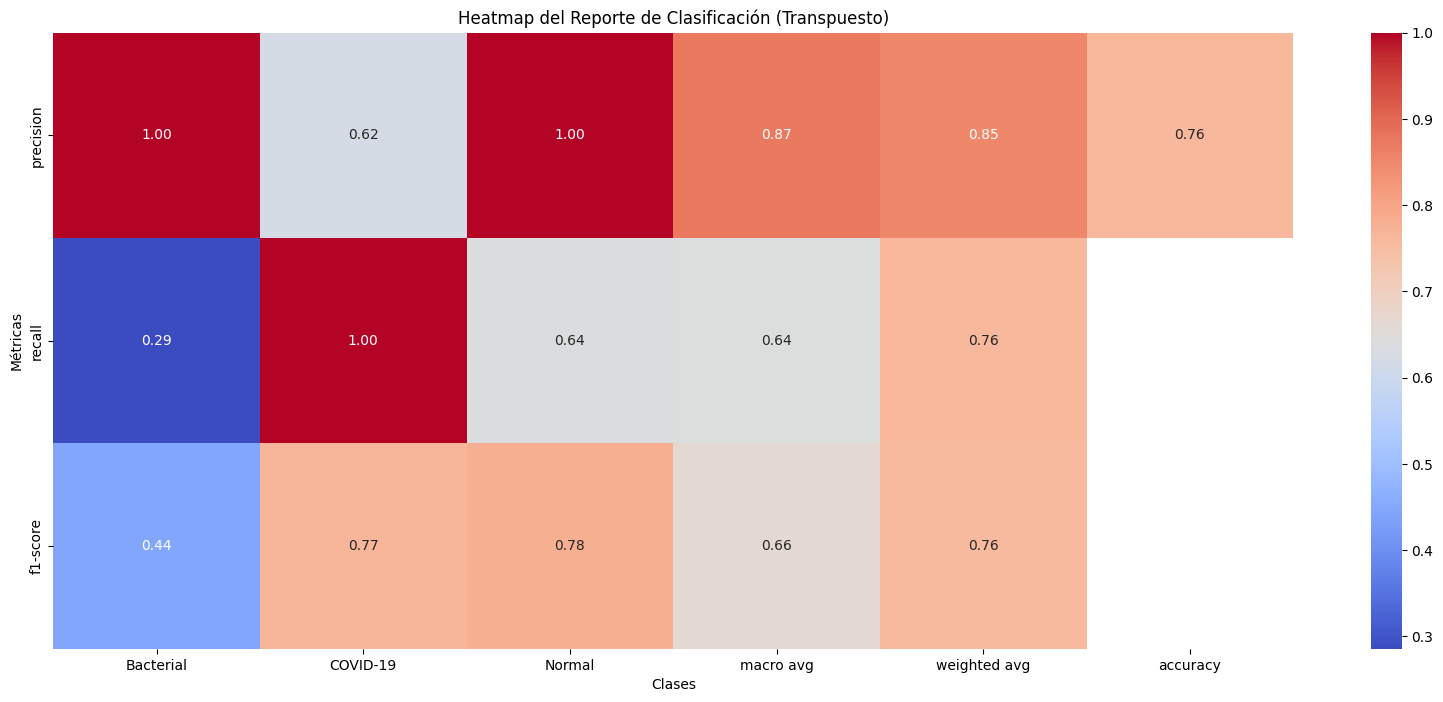

In [44]:
# Filtrar solo las imágenes del conjunto de validación
df_val = df[df["Conjunto"] == "val"]

# Obtener rutas y etiquetas reales
image_paths = df_val["Ruta"].tolist()
y_true = df_val["Clase"].tolist()  # Asegúrate de que la columna tenga el nombre correcto

# # Obtener nombres de clases únicas (importante para el reporte y la matriz)
class_names = sorted(df_val["Clase"].unique())  # Ordenamos para que coincidan con índices
class_indices = {class_name: i for i, class_name in enumerate(class_names)}
y_true_indices = [class_indices[label] for label in y_true]  # Convertimos etiquetas a índices

# 3️⃣ Cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)  # Cargar la imagen
    if img is None:
        print(f"Error: No se pudo cargar la imagen en la ruta: {img_path}")
        return None  # O puedes lanzar una excepción
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
    img = cv2.resize(img, target_size)  # Redimensionar
    img = img / 255.0  # Normalizar a [0, 1]
    return img

# Cargar todas las imágenes
X_val = np.array([load_and_preprocess_image(img.replace('\\', '/')) for img in image_paths])

# 4️⃣ Hacer predicciones
y_pred_probs = modelo.predict(X_val)  # Obtiene probabilidades
y_pred_indices = np.argmax(y_pred_probs, axis=1)  # Índices de las clases predichas

# 5️⃣ Matriz de Confusión
cm = confusion_matrix(y_true_indices, y_pred_indices)

# 6️⃣ Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()

# 7️⃣ Imprimir informe de clasificación
report = classification_report(y_true_indices, y_pred_indices, target_names=class_names, output_dict=True)

# Extraer solo precision, recall y f1-score (sin support)
metrics = ["precision", "recall", "f1-score"]

# Incluir clases + "macro avg" + "weighted avg"
valid_labels = class_names + ["macro avg", "weighted avg"]

# Crear la matriz con métricas para las clases + promedios
report_matrix = np.array([[report[label][metric] for metric in metrics] for label in valid_labels], dtype=float)

# Extraer accuracy (valor único)
accuracy_value = report["accuracy"]

# Agregar accuracy como una fila adicional (usando np.nan en recall y f1-score)
accuracy_row = np.array([accuracy_value, np.nan, np.nan], dtype=float)
report_matrix = np.vstack([report_matrix, accuracy_row])

# Etiquetas de filas actualizadas (incluyendo "accuracy")
final_labels = valid_labels + ["accuracy"]

# 🚀 TRASPONER LA MATRIZ PARA QUE LAS MÉTRICAS SEAN FILAS Y LAS CLASES COLUMNAS
report_matrix = report_matrix.T

# 🚀 Ajustar el tamaño para que sea más alargada
plt.figure(figsize=(20, 8))  # Aumentar la altura

# Crear heatmap con la matriz traspuesta
sns.heatmap(report_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=final_labels, yticklabels=metrics)

plt.title("Heatmap del Reporte de Clasificación (Transpuesto)")
plt.xlabel("Clases")
plt.ylabel("Métricas")
plt.show()